# Lesson 9 Assignment - Wine Neural Network

   ## Author - Mike Pearson

## Instructions
For this assignment you will start from the perceptron neural network notebook (Simple Perceptron Neural Network.ipynb) and modify the python code to make it into a multi-layer neural network. To test your system, use the RedWhiteWine.csv file with the goal of building a red or white wine classifier. Use all the features in the dataset, allowing the network to decide how to build the internal weighting system.

## Tasks
1. Use the provided RedWhiteWine.csv file. Include ALL the features with “Class” being your output vector
2. Use the provided Simple Perceptron Neural Network notebook (copied below) to develop a multi-layer feed-forward/backpropagation neural network
4. Be able to adjust the following between experiments:
<ul>
<li>Learning Rate
<li>Number of epochs
<li>Depth of architecture—number of hidden layers between the input and output layers
<li>Number of nodes in a hidden layer—width of the hidden layers
<li>(optional) Momentum
    </ul>
5. Determine what the best neural network structure and hyperparameter settings results in the
best predictive capability

In [52]:
# Data Set
URL = "https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/RedWhiteWine.csv"

# Import the data and set up the usual libraries

In [53]:
import numpy as np
import pandas as pd

wine_data = pd.read_csv(URL)
##print(wine_data.head())
##print(wine_data.dtypes)
##print(wine_data.describe())



## Set up the sigmoid function and the derivative function

In [54]:
# sigmoid function

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))


### Scale the Data
 Let's scale our data and see if we can help the learning some

In [66]:
num_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                'sulphates', 'alcohol', 'quality']
 
##scaled_features = {}
scaled_wine_data = pd.DataFrame()
for each in num_features:
    mean, std = wine_data[each].mean(), wine_data[each].std(), 
    rng = np.max(wine_data[each]) - np.min(wine_data[each])
    scaled_wine_data.loc[:, each] = (wine_data[each] - mean)/rng

print(scaled_wine_data.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean    5.608211e-16     -3.067277e-15  4.212037e-15   -1.136774e-16   
std     1.071433e-01      1.097576e-01  8.754088e-02    7.297245e-02   
min    -2.822568e-01     -1.731107e-01 -1.919477e-01   -7.428275e-02   
25%    -6.738075e-02     -7.311067e-02 -4.134531e-02   -5.587784e-02   
50%    -1.779397e-02     -3.311067e-02 -5.200732e-03   -3.747293e-02   
75%     4.005727e-02      4.022267e-02  4.299204e-02    4.074792e-02   
max     7.177432e-01      8.268893e-01  8.080523e-01    9.257172e-01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   1.114006e-15        -8.894056e-17         -1.392275e-16  1.260695e-13   
std    5.819535e-02         6.162986e-02          1.302347e-01  5.781132e-02   
min   -7.812934e-02        -1.0

### Perform a simple two layer neural network


In [73]:
# input dataset


Z = scaled_wine_data
X = Z
print("X shape is ", X.shape)

YY = wine_data['Class'].T
Y = YY
y = np.array([Y]).T


print("y shape is ", y.shape)
np.random.seed(1)

# initialize weights randomly with mean 0

##n = hidden layers

n = 2
syn0 = 2*np.random.random((12,n)) - 1
syn1 = 2*np.random.random((n,1)) - 1

for iter in range(20000):
 
    # forward propagation
    l_zero = X
    l_one = nonlin(np.dot(l_zero,syn0))
    l_two = nonlin(np.dot(l_one, syn1))
    # how much did we miss?
    l_two_error = y - l_two
    
 
    # multiply how much we missed by the
    # slope of the sigmoid at the values in l1
    l_two_delta = l_two_error * nonlin(l_two,True)
    l_one_error = l_two_delta.dot(syn1.T)
    ##print('derivative is ', nonlin(l1,True))
    # update weights
    l_one_delta = l_one_error * nonlin(l_one,deriv=True)
    syn0 =syn0 + np.dot(l_zero.T,l_one_delta)
    syn1 =syn1 + np.dot(l_one.T,l_two_delta)
print ("Output After Training:")
print (l_two[6492:6497])
print("initial is ", y[6492:6497])
print("l_one shape is", l_one.shape)  
print("l_two shape is", l_two.shape)
print("l_one_error shape is", l_one_error.shape)
print("l_one_delta shape is", l_one_delta.shape)

X shape is  (6497, 12)
y shape is  (6497, 1)
Output After Training:
[[2.12444400e-151]
 [7.30056491e-139]
 [1.36091039e-099]
 [3.76258671e-043]
 [1.19487429e-130]]
initial is  [[0]
 [0]
 [0]
 [0]
 [0]]
l_one shape is (6497, 2)
l_two shape is (6497, 1)
l_one_error shape is (6497, 2)
l_one_delta shape is (6497, 2)


### Now with selectable alphas and selectable hidden layers


In [70]:
# Selectable hidden layers
# Passed in the weight vectors, bias vector, the input vector and the Y

n_lay = 32
alphaz = [0.0001,0.001,0.01, 0.1, 1, 10, 100, 1000]


n_synapse = 2*np.random.random((12,n_lay)) - 1

print(n_synapse.shape)

for iter in range(2)
    l_zed = X
    for i in range(n_lay)
        

(12, 5)


### Backpropagation

Here I am calculating the loss/cost. The loss function here is a logistic loss function and in this case of binary classification, this is also a cross-entropy loss

Cross Entropy loss for a single datapoint = $\sum_{i=1}^{c} y_i*log (\hat y_i) $
For binary classification: $y_i*log (\hat y_i) + (1-y_i)*log(1-\hat y_i) $

Lastly, the gradients W1 and B1 are calculated and returned along with the total cost/loss

In [110]:
#Single layer network: Backprop

def back_prop(A1,W1,bias,X,Y):

    m = np.shape(X)[1] # used the calculate the cost by the number of inputs -1/m
   
    # Cross entropy loss function
    cost = (-1/m)*np.sum(Y*np.log(A1) + (1-Y)*np.log(1-A1)) # cost of error
    dZ1 = A1 - Y                                            # subtract actual from pred weights
    dW1 = (1/m) * np.dot(dZ1, X.T)                          # calc new weight vector
    dBias = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)  # calc new bias vector
    
    grads ={"dW1": dW1, "dB1":dBias} # Weight and bias vectors after backprop
    print(cost)
    return(grads,cost)

### Gradient Descent
This function performs a simple gradient descent. After completing a round of forward propagation and backward propagation, the weights are updated based on the learning rate and gradient. The loss for that iteration is recorded in the loss_array. The function returns the final parameters W1 (updated weight vector), B1 (bias) and the loss array after running for given number of iterations.

In [89]:
def run_grad_desc(num_epochs,learning_rate,X,Y,n_1):
    
    n_0, m = np.shape(X)
    
    W1 = init_parameters(n_1, n_0, True)
    B1 = init_parameters(n_1,1, True)
    
    loss_array = np.ones([num_epochs])*np.nan # resets the loss_array to NaNs
    
    for i in np.arange(num_epochs):
        A1 = fwd_prop(W1,B1,X,Y)                # get predicted vector
        grads,cost = back_prop(A1,W1,B1,X,Y)    # get gradient and the cost from BP 
        
        W1 = W1 - learning_rate*grads["dW1"]    # update weight vector LR*gradient*[BP weights]
        B1 = B1 - learning_rate*grads["dB1"]    # update bias LR*gradient[BP bias]
        
        loss_array[i] = cost                    # loss array gets cross ent values
        
        parameter = {"W1":W1,"B1":B1}           # assign 
    
    return(parameter,loss_array)

### Arrange the Wine data, scale the features

Now that all of the helper functions are created we can run gradient descent on the handcrafted dataset that I had created earlier. Note that I am using n_1 = 1, therefore, I am just using one output node.

In [90]:
num_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
                'sulphates', 'alcohol', 'quality']
 
##scaled_features = {}
scaled_wine_data = pd.DataFrame()
for each in num_features:
    mean, std = wine_data[each].mean(), wine_data[each].std(), 
    rng = np.max(wine_data[each]) - np.min(wine_data[each])
    scaled_wine_data.loc[:, each] = (wine_data[each] - mean)/rng

print(scaled_wine_data.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   6.497000e+03      6.497000e+03  6.497000e+03    6.497000e+03   
mean    5.608211e-16     -3.067277e-15  4.212037e-15   -1.136774e-16   
std     1.071433e-01      1.097576e-01  8.754088e-02    7.297245e-02   
min    -2.822568e-01     -1.731107e-01 -1.919477e-01   -7.428275e-02   
25%    -6.738075e-02     -7.311067e-02 -4.134531e-02   -5.587784e-02   
50%    -1.779397e-02     -3.311067e-02 -5.200732e-03   -3.747293e-02   
75%     4.005727e-02      4.022267e-02  4.299204e-02    4.074792e-02   
max     7.177432e-01      8.268893e-01  8.080523e-01    9.257172e-01   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  6.497000e+03         6.497000e+03          6.497000e+03  6.497000e+03   
mean   1.114006e-15        -8.894056e-17         -1.392275e-16  1.260695e-13   
std    5.819535e-02         6.162986e-02          1.302347e-01  5.781132e-02   
min   -7.812934e-02        -1.0

## Now create the output data

In [91]:
output = wine_data['Class']
print(output.dtypes)
print(Y.shape)
n_0, m = np.shape(scaled_wine_data)
print(n_0)
print(m)

int64
(6,)
6497
12


In [113]:
num_epochs = 10000
learning_rate = 0.01
try1 = scaled_wine_data[['alcohol','pH']]
print(try1.head())
params, loss_array = run_grad_desc(num_epochs, learning_rate, X, Y, n_1= 1)
print(loss_array[num_epochs-1])

    alcohol        pH
0 -0.158232  0.225968
1 -0.100261 -0.014342
2 -0.100261  0.032170
3 -0.100261 -0.045349
4 -0.158232  0.225968
2.3712834398411116
2.3325935392843795
2.2939865209980006
2.2554692558991674
2.2170491569664246
2.178734216462615
2.140533044656858
2.102454909892563
2.064509779794828
2.02670836334814
1.9890621535031157
1.9515834698889636
1.9142855011151907
1.8771823460425445
1.8402890532883371
1.8036216581069127
1.7671972156522984
1.7310338294897103
1.6951506740780573
1.6595680098012517
1.6243071889868097
1.5893906512231397
1.554841906179632
1.5206855020563204
1.4869469777533642
1.453652796867237
1.4208302617036668
1.3885074056602522
1.3567128625874523
1.3254757120961718
1.294825300252144
1.26479103568526
1.235402161844053
1.2066875069319216
1.1786752139540075
1.1513924542536125
1.1248651288865772
1.0991175631236727
1.0741722002298077
1.0500493013852212
1.026766659127522
1.004339331948771
0.9827794076326517
0.9620958025323826
0.942294103259533
0.9233764561897331
0.9053415

0.5536062828007743
0.553506387103528
0.5534065296363924
0.5533067103814964
0.5532069293209771
0.5531071864369791
0.5530074817116548
0.5529078151271642
0.5528081866656751
0.5527085963093631
0.5526090440404114
0.5525095298410112
0.5524100536933613
0.5523106155796678
0.5522112154821455
0.5521118533830156
0.5520125292645084
0.5519132431088611
0.5518139948983187
0.5517147846151342
0.5516156122415682
0.5515164777598889
0.5514173811523722
0.551318322401302
0.5512193014889696
0.5511203183976745
0.5510213731097232
0.5509224656074306
0.5508235958731189
0.5507247638891181
0.550625969637766
0.5505272131014081
0.5504284942623976
0.5503298131030951
0.5502311696058697
0.5501325637530973
0.5500339955271623
0.549935464910456
0.549836971885378
0.5497385164343355
0.5496400985397433
0.5495417181840239
0.5494433753496074
0.5493450700189322
0.5492468021744435
0.5491485717985947
0.549050378873847
0.5489522233826694
0.5488541053075378
0.5487560246309364
0.5486579813353573
0.5485599754032997
0.5484620068172712

0.4699373225944474
0.4698680236891184
0.4697987486966451
0.4697294976059899
0.46966027040612085
0.4695910670860109
0.4695218876346397
0.4694527320409919
0.4693836002940579
0.4693144923828337
0.4692454082963208
0.4691763480235265
0.4691073115534637
0.46903829887515053
0.4689693099776112
0.4689003448498754
0.4688314034809784
0.4687624858599606
0.4686935919758688
0.46862472181775466
0.468555875374676
0.4684870526356958
0.46841825358988276
0.46834947822631134
0.4682807265340614
0.46821199850221823
0.46814329411987265
0.4680746133761219
0.46800595626006736
0.46793732276081734
0.46786871286748477
0.46780012656918857
0.46773156385505305
0.4676630247142083
0.4675945091357894
0.467526017108938
0.4674575486228
0.4673891036665279
0.4673206822292793
0.46725228430021726
0.46718390986851044
0.4671155589233334
0.4670472314538655
0.46697892744929237
0.46691064689880457
0.46684238979159853
0.4667741561168762
0.466705945863845
0.46663775902171756
0.46656959557971256
0.4665014555270537
0.4664333388529705

0.40749328681773866
0.40744427467097555
0.40739527735364295
0.4073462948593809
0.40729732718183254
0.4072483743146441
0.4071994362514654
0.4071505129859494
0.4071016045117522
0.40705271082253336
0.407003831911955
0.4069549677736838
0.4069061184013885
0.4068572837887414
0.4068084639294184
0.4067596588170984
0.40671086844546306
0.40666209280819837
0.4066133318989925
0.4065645857115373
0.40651585423952796
0.40646713747666274
0.40641843541664313
0.40636974805317405
0.406321075379963
0.4062724173907214
0.40622377407916377
0.4061751454390077
0.4061265314639739
0.4060779321477864
0.4060293474841728
0.40598077746686323
0.40593222208959134
0.4058836813460944
0.40583515523011227
0.4057866437353881
0.40573814685566856
0.40568966458470335
0.40564119691624556
0.40559274384405103
0.40554430536187924
0.4054958814634926
0.40544747214265664
0.4053990773931405
0.40535069720871625
0.405302331583159
0.4052539805102473
0.40520564398376263
0.40515732199749
0.40510901454521725
0.4050607216207355
0.4050124432

0.36421725198473587
0.3641805632712337
0.3641438843173122
0.3641072151191551
0.36407055567294866
0.36403390597488006
0.363997266021139
0.3639606358079171
0.3639240153314076
0.36388740458780533
0.36385080357330746
0.3638142122841126
0.3637776307164216
0.36374105886643676
0.3637044967303627
0.36366794430440563
0.36363140158477303
0.36359486856767553
0.3635583452493244
0.36352183162593327
0.36348532769371755
0.36344883344889467
0.3634123488876833
0.36337587400630494
0.36333940880098164
0.36330295326793843
0.3632665074034017
0.3632300712035996
0.3631936446647622
0.36315722778312154
0.36312082055491135
0.363084422976367
0.36304803504372624
0.363011656753228
0.3629752881011133
0.36293892908362496
0.36290257969700823
0.3628662399375091
0.3628299098013761
0.3627935892848595
0.3627572783842108
0.3627209770956845
0.36268468541553567
0.36264840334002213
0.3626121308654029
0.362575867987939
0.3625396147038935
0.3625033710095309
0.36246713690111787
0.36243091237492286
0.36239469742721553
0.36235849

0.3316957742078074
0.3316672430462533
0.33163871859534644
0.3316102008527065
0.3315816898159547
0.3315531854827131
0.3315246878506051
0.331496196917255
0.33146771268028796
0.33143923513733076
0.3314107642860106
0.3313823001239564
0.3313538426487976
0.3313253918581649
0.3312969477496903
0.3312685103210067
0.33124007956974766
0.33121165549354886
0.3311832380900459
0.33115482735687607
0.33112642329167763
0.33109802589209003
0.3310696351557535
0.3310412510803091
0.33101287366339993
0.330984502902669
0.3309561387957616
0.3309277813403229
0.3308994305339995
0.33087108637443974
0.33084274885929227
0.3308144179862068
0.33078609375283474
0.3307577761568278
0.3307294651958394
0.33070116086752305
0.3306728631695349
0.33064457209953035
0.33061628765516765
0.3305880098341046
0.3305597386340006
0.33053147405251665
0.3305032160873137
0.33047496473605503
0.33044671999640374
0.3304184818660248
0.33039025034258407
0.3303620254237486
0.3303338071071857
0.33030559539056464
0.33027739027155545
0.3302491917

0.30511515939909656
0.30509252638415996
0.3050698980848622
0.3050472744996917
0.3050246556271378
0.3050020414656908
0.30497943201384065
0.3049568272700791
0.3049342272328976
0.3049116319007886
0.30488904127224564
0.30486645534576173
0.3048438741198319
0.3048212975929506
0.30479872576361355
0.3047761586303172
0.30475359619155795
0.3047310384458336
0.3047084853916421
0.30468593702748203
0.304663393351853
0.3046408543632548
0.30461832006018785
0.3045957904411537
0.3045732655046539
0.30455074524919107
0.304528229673268
0.3045057187753887
0.3044832125540572
0.3044607110077786
0.3044382141350585
0.3044157219344029
0.3043932344043186
0.3043707515433132
0.3043482733498945
0.30432579982257124
0.30430333095985285
0.30428086676024885
0.30425840722227
0.3042359523444273
0.3042135021252326
0.3041910565631981
0.3041686156568372
0.30414617940466293
0.3041237478051898
0.30410132085693253
0.30407889855840664
0.30405648090812787
0.3040340679046134
0.30401165954638
0.3039892558319459
0.3039668567598299
0

0.28410972583945227
0.28409123980666023
0.28407275721952
0.284054278077029
0.28403580237818404
0.2840173301219831
0.2839988613074241
0.28398039593350555
0.2839619339992263
0.2839434755035857
0.2839250204455829
0.2839065688242185
0.28388812063849256
0.2838696758874059
0.2838512345699594
0.28383279668515504
0.2838143622319943
0.2837959312094796
0.2837775036166138
0.28375907945239975
0.28374065871584075
0.2837222414059409
0.2837038275217043
0.28368541706213524
0.28366701002623906
0.2836486064130209
0.2836302062214864
0.2836118094506417
0.28359341609949323
0.283575026167048
0.2835566396523131
0.2835382565542961
0.283519876872005
0.28350150060444834
0.28348312775063456
0.2834647583095731
0.283446392280273
0.2834280296617446
0.28340967045299803
0.28339131465304357
0.28337296226089265
0.2833546132755565
0.283336267696047
0.28331792552137613
0.2832995867505563
0.2832812513826005
0.2832629194165223
0.283244590851335
0.2832262656860526
0.2832079439196896
0.283189625551261
0.28317131057978145
0.2

0.26605382587805254
0.2660385327216737
0.26602324212277606
0.26600795408068345
0.26599266859471926
0.26597738566420726
0.2659621052884718
0.26594682746683723
0.2659315521986279
0.26591627948316876
0.2659010093197851
0.26588574170780177
0.26587047664654473
0.26585521413533947
0.26583995417351225
0.265824696760389
0.2658094418952964
0.2657941895775613
0.2657789398065105
0.26576369258147103
0.26574844790177077
0.2657332057667368
0.2657179661756975
0.2657027291279809
0.2656874946229151
0.2656722626598289
0.26565703323805134
0.26564180635691115
0.26562658201573786
0.265611360213861
0.26559614095061024
0.26558092422531565
0.26556571003730733
0.26555049838591616
0.26553528927047243
0.2655200826903075
0.26550487864475225
0.2654896771331382
0.26547447815479697
0.2654592817090606
0.2654440877952611
0.2654288964127308
0.26541370756080235
0.26539852123880847
0.26538333744608233
0.2653681561819574
0.26535297744576675
0.2653378012368445
0.2653226275545245
0.26530745639814113
0.26529228776702857
0.26

0.25114306105721695
0.25113014323008476
0.25111722735828323
0.2511043134413392
0.2510914014787793
0.2510784914701313
0.25106558341492197
0.25105267731267894
0.25103977316293014
0.25102687096520293
0.25101397071902554
0.2510010724239257
0.250988176079432
0.25097528168507277
0.2509623892403765
0.2509494987448717
0.25093661019808744
0.25092372359955256
0.25091083894879657
0.25089795624534816
0.2508850754887375
0.2508721966784937
0.25085931981414655
0.250846444895226
0.25083357192126227
0.25082070089178543
0.2508078318063258
0.25079496466441414
0.25078209946558094
0.250769236209357
0.2507563748952734
0.250743515522861
0.2507306580916514
0.2507178026011757
0.250704949050966
0.25069209744055354
0.25067924776947026
0.25066640003724844
0.25065355424341995
0.25064071038751734
0.2506278684690732
0.25061502848761974
0.2506021904426903
0.2505893543338173
0.2505765201605341
0.25056368792237393
0.25055085761887
0.25053802924955604
0.2505252028139657
0.2505123783116327
0.2504995557420915
0.2504867351

Here the boundary of separation is 0. That is values less than 0 belong to class 0 and greater than 0 belong to class 1.
Key thing to note here is that the data we generated was a linearly separable data and hence there are many possible options for the separting plane. Unlike SVM, logistic regression does not necessarily find the best separting plane, but finds a locally optimum solution that separates the classes of data. 

### Plot of the loss array
Here we want to ensure that the loss value per iteration is going down. However, note that the plot has not curved to reach stablizing value i.e we can run the algorithms more times to get a lower loss. However, this is not needed as the current value of the parameters can classify the input data accurately.

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 6.0) #Set default plot sizes
plt.rcParams['image.interpolation'] = 'nearest' #Use nearest neighbor for rendering

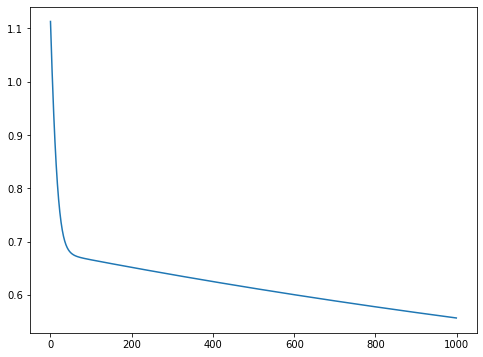

In [71]:
plt.plot(loss_array)
plt.show()

### Another example with handcrafted dataset
values below 0.5 are assigned to class 1 and values above are set to class 0.

In [ ]:
X = np.array([[0.25,0.75],[0.1,0.9],[0.3,0.8],[0.8,0.25],[0.9,0.2],[0.7,0.1]])
X = np.array([[0.11,0.12],[0.05,0.1],[0.15,0.11],[0.8,0.9],[0.9,0.8],[0.85,0.95]])
X = X.T #Had to do this because, I did not declare the X array as (#dimension * # Datapoints)
Y = np.array([1,1,1,0,0,0])
print(X)

In [ ]:
params, loss_array = run_grad_desc(100000,0.01,X,Y,n_1= 1 )

In [ ]:
plt.plot(loss_array)
plt.show()

In [19]:
import matplotlib.pyplot as plt 
from numpy import linalg as LA
from scipy import optimize
########################################################################
#We've got 50 values from each.  Then we scale each of them 
#to a range of [0,1]
########################################################################
def prepAndNormalizeData(string):
  anArray = []


  with open(string+".txt") as f:
    for line in f:
      
      line = line.strip('\n')
      line = line.strip('')
      line = float(line)
      anArray.append(line)




  newArray = np.array(anArray)
  newArray = newArray-min(anArray)
  newArray = newArray/(max(newArray)-min(newArray))
  f.close()
  return newArray


sugar = scaled_wine_data["residual sugar"]


density = scaled_wine_data["fixed acidity"]


alcohol = scaled_wine_data["volatile acidity"]

y = output


rows = 49


cols = 3


X = np.zeros((50,3))#input matrix X = (sugar, density, alcohol).  Should be 3 col and 50 rows


for i in range(50):
    X[i][0] = (sugar[i])
    X[i][1] = (density[i])
    X[i][2] = (alcohol[i])

print("X is ", X[1:5,0:2])

Y = np.zeros((50,1))


for i in range(50):
    Y[i][0] = (y[i])


y = Y


########################################################################
#Now we create the actual structure/hyperparameters of the neural net
########################################################################


class neuralNetwork():


  def __init__(self):
    self.inputLayerSize = 3
    self.outputLayerSize = 1
    self.hiddenLayerSize = 4
    self.W1 = np.random.randn(3, 4)*math.sqrt(2.0/3) #Neurons at this layer get 3 inputs 
    self.W2 = np.random.randn(4, 1)*math.sqrt(2.0/4)    




  def relu(self, z):#Additional/optional activation function.  Performs poorly at the moment
    return np.maximum(0, z)


  def reluPrime(self,z):#Necessary derivative for gradient calculation 
    z = (z>0)#Converts all z2 elements to either TRUE or FALSE if element greater than 0
    z = z+0    
    return z


  def sigmoid(self, z):    #Apply sigmoid activation function to scalar, vector, or matrix
    return 1/(1+np.exp(-z))


  def sigmoidPrime(self,z):    #Gradient of sigmoid
    return np.exp(-z)/((1+np.exp(-z))**2)


  def forward(self, X):
    self.z2 = np.dot(X,self.W1)#Second layer activity, hence z2
    self.a2 = self.sigmoid(self.z2)
    self.z3 = np.dot(self.a2,self.W2)#Third layer activity, hence z3
    yHat = self.sigmoid(self.z3)


    return yHat#Our neural network's "guess"




#Benefit of Quadratic Cost Function is that it limits the times we run into a local minimum problem (Though not always)


  def costFunction(self, X, y):
    self.yHat = self.forward(X)
    L = 0.5*sum((y-self.yHat)**2)
    return L




#Compute derivative with respect to W and W2 for a given X and y:
#See http://neuralnetworksanddeeplearning.com/ for thorough understanding of
#How to derive these gradients.  We essentially just use the chain rule a lot.


  def costFunctionPrime(self, X, y):    


    self.yHat = self.forward(X)  
    dLdyHat = np.subtract(yHat,y)  
    delta3 = np.multiply((dLdyHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)
        
    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    dJdW1 = np.dot(X.T, delta2)  
    return dJdW1, dJdW2


  def getParams(self):
    #Get W1 and W2 unrolled into vector:
    params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
    return params


  def setParams(self, params):
    #Set W1 and W2 using single paramater vector.
    W1_start = 0
    W1_end = self.hiddenLayerSize * self.inputLayerSize
    self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
    W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
    self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
  def computeGradients(self, X, y):
    dJdW1, dJdW2 = self.costFunctionPrime(X, y)
    return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))




NN = neuralNetwork()
yHat = NN.forward(X)


########################################################################
#Bar graph to show error difference prior to training 
########################################################################



############################################################################
#We start to train our network below in a "too basic" gradient descent algorithm
############################################################################


grad = NN.computeGradients(X,y) 


learningRate = 0.01#Arbitrarily chosen learning rate for now.  Will choose optimal value post reading theory
#This is almost certainly too high however.  


for i in range(40):#40 is another randomly chosen value.  Next step is to stop when our gradients approach zero.  
#Yes that could put us in a local minimum but let's take this one step at a time.  
  gradients = NN.costFunctionPrime(X,y)
  dLdW1 = gradients[0]
  dLdW2 = gradients[1]
  NN.W1 -= learningRate*dLdW1
  NN.W2 -= learningRate*dLdW2
  print(NN.costFunction(X,y))#In almost all cases our cost function decreases before we "bounce" out of the lowest point.
#This means our learning rate is too high 
  



X is  [[-0.0436079   0.04832173]
 [-0.04820913  0.04832173]
 [-0.0543441   0.32931347]
 [-0.0543441   0.01526388]]
[11.02032878]
[10.50203233]
[9.97443756]
[9.44030701]
[8.90277618]
[8.36529194]
[7.8315241]
[7.30525299]
[6.79023906]
[6.29008385]
[5.80809356]
[5.34715712]
[4.90964959]
[4.49736865]
[4.11150802]
[3.75266717]
[3.42089282]
[3.11574483]
[2.8363776]
[2.58162841]
[2.35010496]
[2.14026641]
[1.950494]
[1.77914951]
[1.62462107]
[1.48535711]
[1.35988976]
[1.2468495]
[1.14497277]
[1.0531043]
[0.97019538]
[0.89529964]
[0.82756691]
[0.76623625]
[0.7106284]
[0.66013833]
[0.61422784]
[0.57241867]
[0.53428609]
[0.4994529]
